In [1]:
import pandas as pd
!mkdir  SaveModel\Model13991121TestSize40000Confidence0

A subdirectory or file SaveModel\Model13991121TestSize40000Confidence0 already exists.


In [2]:
DataTrain= pd.read_csv("SaveModel\Model13991121Testsize4000Confidence95\DataSet\Model13991121Testsize4000Confidence95.csv", encoding="latin1")

len(DataTrain)

2482464

In [3]:
DataTest = pd.read_csv("SaveModel\Model13991121Testsize4000Confidence95\DataSet\ReverbTest-size-38098confidence-0.csv", encoding="latin1")
len(DataTest)

260964

In [4]:
import numpy as np

In [5]:
DataTrain=DataTrain.fillna(method="ffill")
len(DataTrain)


2482464

In [6]:
DataTest= DataTest.fillna(method="ffill")
len(DataTest)

260964

In [7]:
DataTrain.tail(10)

,Sentence #,Word,POS,Tag
2482454,Sentence:399998,of,POS,RE
2482455,Sentence:399998,faith,POS,A2S
2482456,Sentence:399999,religion,POS,A1S
2482457,Sentence:399999,is,POS,RS
2482458,Sentence:399999,the,POS,RI
2482459,Sentence:399999,main,POS,RI
2482460,Sentence:399999,component,POS,RI
2482461,Sentence:399999,of,POS,RE
2482462,Sentence:399999,popular,POS,A2S
2482463,Sentence:399999,culture,POS,A2E


In [8]:
DataTest.tail(10)

,Sentence #,Word,POS,Tag
260954,Sentence:399979,is,POS,RS
260955,Sentence:399979,insurance,POS,RI
260956,Sentence:399979,for,POS,RE
260957,Sentence:399979,insurance,POS,A2S
260958,Sentence:399979,companies,POS,A2E
260959,Sentence:399990,releases,POS,A1S
260960,Sentence:399990,were,POS,RS
260961,Sentence:399990,handled,POS,RI
260962,Sentence:399990,through,POS,RE
260963,Sentence:399990,CEL.,POS,A2S


In [9]:
wordsTrain = list(set(DataTrain["Word"].values))
wordsTrain.append("ENDPAD")
wordsTest = list(set(DataTest["Word"].values))
wordsTest.append("ENDPAD")

In [10]:
n_wordsTrain = len(wordsTrain); n_wordsTrain


140149

In [11]:
n_wordsTest = len(wordsTest); n_wordsTest

38950

In [12]:
tagsTrain = list(set(DataTrain["Tag"].values))
tagsTest = list(set(DataTest["Tag"].values))

In [13]:
tagsTrain

['A2I', 'RE', 'A1E', 'RS', 'A1I', 'A2S', 'A1S', 'RI', 'A2E']

In [14]:
tagsTest

['A2I', 'RE', 'A1E', 'RS', 'A1I', 'A2S', 'A1S', 'RI', 'A2E']

In [15]:
n_tagsTrain = len(tagsTrain); n_tagsTrain
print(n_tagsTrain)



9


In [16]:
n_tagsTest = len(tagsTest); n_tagsTest
print(n_tagsTest)


9


In [17]:
class SentenceGetter1(object):
    
    def __init__(self, DataTest):
        self.n_sent = 1
        self.DataTest = DataTest
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.DataTest.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None



In [18]:
class SentenceGetter2(object):
    
    def __init__(self, DataTrain):
        self.n_sent = 1
        self.DataTrain = DataTrain
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.DataTrain.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None


In [19]:
getterTest = SentenceGetter1(DataTest)
getterTrain = SentenceGetter2(DataTrain)

In [20]:
len(DataTrain)

2482464

In [21]:
sent = getterTrain.get_next()


In [22]:
sentencesTrain = getterTrain.sentences
sentencesTest = getterTest.sentences
len(sentencesTrain)
sentencesTest[0]

[('Dimitrovgrad', 'POS', 'A1S'),
 ('is', 'POS', 'RS'),
 ('a', 'POS', 'RI'),
 ('city', 'POS', 'RI'),
 ('in', 'POS', 'RE'),
 ('Ulyanovsk', 'POS', 'A2S'),
 ('Oblast', 'POS', 'A2E')]

In [23]:
len(sentencesTest)

38098

In [24]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")


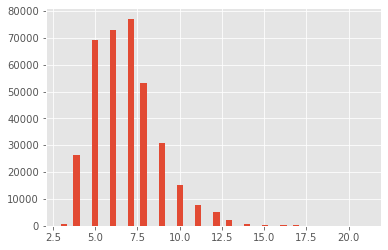

In [25]:
plt.hist([len(s) for s in sentencesTrain], bins=50)
plt.show()


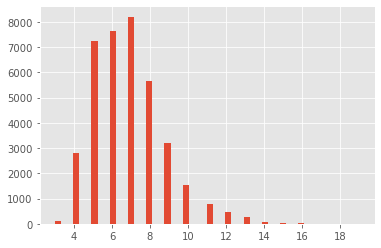

In [26]:
plt.hist([len(s) for s in sentencesTest], bins=50)
plt.show()


In [27]:
max_len = 50
word2idxTrain = {w: i for i, w in enumerate(wordsTrain)}
tag2idxTrain = {t: i for i, t in enumerate(tagsTrain)}
word2idxTrain

{'decentralised': 0,
 'vessel': 1,
 'A*02': 2,
 'uncrowned': 3,
 'adventurers': 4,
 'Doing': 5,
 'Chloe': 6,
 'Convolution': 7,
 'Stahr': 8,
 'Talc': 9,
 'profound': 10,
 'Lipton': 11,
 'crusader': 12,
 'CP/CMS': 13,
 'Dungeon': 14,
 'SYK': 15,
 'Blu-Tack': 16,
 'Rooibos': 17,
 'Flushing': 18,
 'Ruthenia': 19,
 'Spektrum': 20,
 '195960': 21,
 'early-2009': 22,
 'Greenfield': 23,
 'Aristo': 24,
 'Coronel': 25,
 'Umeda': 26,
 'adenocarcinoma': 27,
 'sapiens': 28,
 'boiling': 29,
 'GmailFS': 30,
 'Bonnie': 31,
 'Ramirez': 32,
 'Fully': 33,
 'Pfost': 34,
 'Vanna': 35,
 'Gao': 36,
 'Kie': 37,
 'permeable': 38,
 'Osborne': 39,
 'Delson': 40,
 'Fishel': 41,
 'Japanese-Americans': 42,
 'Gatland': 43,
 'Eurosystem': 44,
 'enthalten': 45,
 'drug-related': 46,
 'Shinj': 47,
 'clean-up': 48,
 'programmable': 49,
 'dismantled': 50,
 'Hulta': 51,
 'barred': 52,
 'Villers-sur-Mer': 53,
 'Nacka': 54,
 'Assassination': 55,
 'Erna': 56,
 'Atiyah': 57,
 'Distributed': 58,
 'unclear': 59,
 'Flute': 60,
 '

In [28]:
#max_len = 50
#word2idxTest = {w: i for i, w in enumerate(wordsTest)}
#tag2idxTest = {t: i for i, t in enumerate(tagsTest)}

In [29]:
XTrain = [ [word2idxTrain[w[0]] for w in s] for s in sentencesTrain]
XTrain

[[58793, 78476, 32115, 5743, 88924, 123442],
 [58793, 113515, 74607, 93578, 128174],
 [58793, 15780, 78070, 33731, 133735, 120668, 37407],
 [109323, 119091, 67424, 22444],
 [50255, 77150, 113413, 77319, 132927],
 [62679, 61017, 89775, 105627, 66118, 93578, 106783],
 [136534, 60369, 61102, 14973],
 [94355, 32115, 76238, 117009, 110376, 136534],
 [67437, 101642, 26345, 61102, 65322],
 [80364, 105627, 68525, 56993, 89670, 93578, 35986, 81577],
 [80364, 67614, 46568, 120668, 110791, 77319, 104320, 50552],
 [76623, 113413, 85327, 134970, 120791, 55692, 65798],
 [109310,
  518,
  105627,
  68525,
  47493,
  51817,
  61102,
  120668,
  22886,
  103630,
  77319,
  112641],
 [78329, 59371, 133735, 129098],
 [78329, 105627, 68525, 39071, 61102, 111485, 518],
 [20795, 51134, 17542, 98013],
 [96418, 105627, 68525, 50434, 61102, 95681, 518],
 [96418, 65705, 133735, 29614],
 [17207, 105627, 46304, 77319, 120668, 70279, 103842, 45247],
 [17207, 36779, 61102, 115103, 518],
 [20005, 105627, 68525, 7621

In [30]:
enumerate("OOV")
len(sentencesTest)

38098

In [31]:
sentencesTest

[[('Dimitrovgrad', 'POS', 'A1S'),
  ('is', 'POS', 'RS'),
  ('a', 'POS', 'RI'),
  ('city', 'POS', 'RI'),
  ('in', 'POS', 'RE'),
  ('Ulyanovsk', 'POS', 'A2S'),
  ('Oblast', 'POS', 'A2E')],
 [('A', 'POS', 'A1S'),
  ('drachma', 'POS', 'A1E'),
  ('was', 'POS', 'RS'),
  ('a', 'POS', 'RI'),
  ('weight', 'POS', 'RI'),
  ('of', 'POS', 'RE'),
  ('grain', 'POS', 'A2S')],
 [('A', 'POS', 'A1S'),
  ('draft', 'POS', 'A1E'),
  ('is', 'POS', 'RS'),
  ('a', 'POS', 'RI'),
  ('process', 'POS', 'RI'),
  ('used', 'POS', 'RI'),
  ('in', 'POS', 'RE'),
  ('the', 'POS', 'A2S'),
  ('United', 'POS', 'A2I'),
  ('States', 'POS', 'A2E')],
 [('Din', 'POS', 'A1S'),
  ('is', 'POS', 'RS'),
  ('a', 'POS', 'RI'),
  ('character', 'POS', 'RI'),
  ('in', 'POS', 'RE'),
  ('The', 'POS', 'A2S'),
  ('Legend', 'POS', 'A2I'),
  ('of', 'POS', 'A2I'),
  ('Zelda', 'POS', 'A2I'),
  ('series', 'POS', 'A2E')],
 [('A', 'POS', 'A1S'),
  ('draft', 'POS', 'A1I'),
  ('bill', 'POS', 'A1E'),
  ('was', 'POS', 'RS'),
  ('published', 'POS', 'RI')

In [32]:
MYS=1
MYW=1
XTest=[[]]
XTest
for s in sentencesTest:
 XTest.append([])
 #MYW=0
 for w in s:
    if w[0] in word2idxTrain:
     XTest[MYS].append(word2idxTrain[w[0]])
    else:
     XTest[MYS].append(80000)   
     MYW+=1
        
 MYS+= 1
XTest.pop(0)

[]

In [33]:
XTest[0]

[94355, 105627, 68525, 39071, 61102, 80000, 139582]

In [34]:
XTrain[0]


[58793, 78476, 32115, 5743, 88924, 123442]

In [35]:
sentencesTest

[[('Dimitrovgrad', 'POS', 'A1S'),
  ('is', 'POS', 'RS'),
  ('a', 'POS', 'RI'),
  ('city', 'POS', 'RI'),
  ('in', 'POS', 'RE'),
  ('Ulyanovsk', 'POS', 'A2S'),
  ('Oblast', 'POS', 'A2E')],
 [('A', 'POS', 'A1S'),
  ('drachma', 'POS', 'A1E'),
  ('was', 'POS', 'RS'),
  ('a', 'POS', 'RI'),
  ('weight', 'POS', 'RI'),
  ('of', 'POS', 'RE'),
  ('grain', 'POS', 'A2S')],
 [('A', 'POS', 'A1S'),
  ('draft', 'POS', 'A1E'),
  ('is', 'POS', 'RS'),
  ('a', 'POS', 'RI'),
  ('process', 'POS', 'RI'),
  ('used', 'POS', 'RI'),
  ('in', 'POS', 'RE'),
  ('the', 'POS', 'A2S'),
  ('United', 'POS', 'A2I'),
  ('States', 'POS', 'A2E')],
 [('Din', 'POS', 'A1S'),
  ('is', 'POS', 'RS'),
  ('a', 'POS', 'RI'),
  ('character', 'POS', 'RI'),
  ('in', 'POS', 'RE'),
  ('The', 'POS', 'A2S'),
  ('Legend', 'POS', 'A2I'),
  ('of', 'POS', 'A2I'),
  ('Zelda', 'POS', 'A2I'),
  ('series', 'POS', 'A2E')],
 [('A', 'POS', 'A1S'),
  ('draft', 'POS', 'A1I'),
  ('bill', 'POS', 'A1E'),
  ('was', 'POS', 'RS'),
  ('published', 'POS', 'RI')

In [36]:
XTest[1][0]

62679

In [37]:

arr = np.array([[1, 2, 3], [4, 5, 6]])

for x in arr:
  for y in x:
    print(y)

1
2
3
4
5
6


In [38]:
XTest[1][2]

32115

In [40]:
from keras.preprocessing.sequence import pad_sequences
XTrain = pad_sequences(maxlen=max_len, sequences=XTrain, padding="post", value=n_wordsTrain - 1)
XTest = pad_sequences(maxlen=max_len, sequences=XTest, padding="post", value=n_wordsTrain - 1) #******

Using TensorFlow backend.


In [47]:
YTrain = [[tag2idxTrain[w[2]] for w in s] for s in sentencesTrain]
YTrain = pad_sequences(maxlen=max_len, sequences=YTrain, padding="post", value=tag2idxTrain["A2E"])
from keras.utils import to_categorical
YTrain = [to_categorical(i, num_classes=n_tagsTrain) for i in YTrain]

In [50]:
YTest = [[tag2idxTrain[w[2]] for w in s] for s in sentencesTest]
YTest = pad_sequences(maxlen=max_len, sequences=YTest, padding="post", value=tag2idxTrain["A2E"])
from keras.utils import to_categorical
YTest = [to_categorical(i, num_classes=n_tagsTest) for i in YTest]

In [51]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional


In [52]:
input = Input(shape=(max_len,))
model = Embedding(input_dim=n_wordsTrain, output_dim=50, input_length=max_len)(input)  # 50-dim embedding
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)  # variational biLSTM
out = TimeDistributed(Dense(n_tagsTrain, activation="softmax"))(model)  # softmax output layer

In [53]:
model = Model(input, out)

In [54]:
import keras_metrics as km
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=['accuracy',km.precision(), km.recall()])

tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> tp
tracking <tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0> fn


In [55]:
history = model.fit(XTrain, np.array(YTrain), batch_size=32, epochs=5, validation_split=0.1, verbose=1)

C:\Users\hoshyar\anaconda3\envs\tf\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 325711 samples, validate on 36191 samples
Epoch 1/5
325711/325711 [==============================] - 1343s 4ms/step - loss: 0.0086 - accuracy: 0.9973 - precision: 0.9629 - recall: 0.8841 - val_loss: 0.0020 - val_accuracy: 0.9995 - val_precision: 0.9929 - val_recall: 0.9962
Epoch 2/5
325711/325711 [==============================] - 1327s 4ms/step - loss: 0.0012 - accuracy: 0.9996 - precision: 0.9966 - recall: 0.9947 - val_loss: 0.0015 - val_accuracy: 0.9996 - val_precision: 0.9985 - val_recall: 0.9949
Epoch 3/5
325711/325711 [==============================] - 1328s 4ms/step - loss: 9.2917e-04 - accuracy: 0.9997 - precision: 0.9975 - recall: 0.9959 - val_loss: 0.0012 - val_accuracy: 0.9997 - val_precision: 0.9977 - val_recall: 0.9958
Epoch 4/5
325711/325711 [==============================] - 1328s 4ms/step - loss: 7.6222e-04 - accuracy: 0.9998 - precision: 0.9982 - recall: 0.9962 - val_loss: 0.0013 - val_accuracy: 0.9997 - val_precision: 0.9986 - val_recall: 0.9957
Epoch 5/5
325

In [56]:
hist = pd.DataFrame(history.history)
hist

,val_loss,val_accuracy,val_precision,val_recall,loss,accuracy,precision,recall
0,0.001971,0.999463,0.992918,0.996212,0.008630,0.997323,0.962924,0.884062
1,0.001479,0.999608,0.998483,0.994853,0.001234,0.999647,0.996553,0.994736
2,0.001237,0.999670,0.997689,0.995803,0.000929,0.999744,0.997451,0.995883
3,0.001289,0.999678,0.998631,0.995683,0.000762,0.999798,0.998208,0.996179
4,0.001416,0.999677,0.998774,0.994846,0.000633,0.999835,0.998348,0.996558


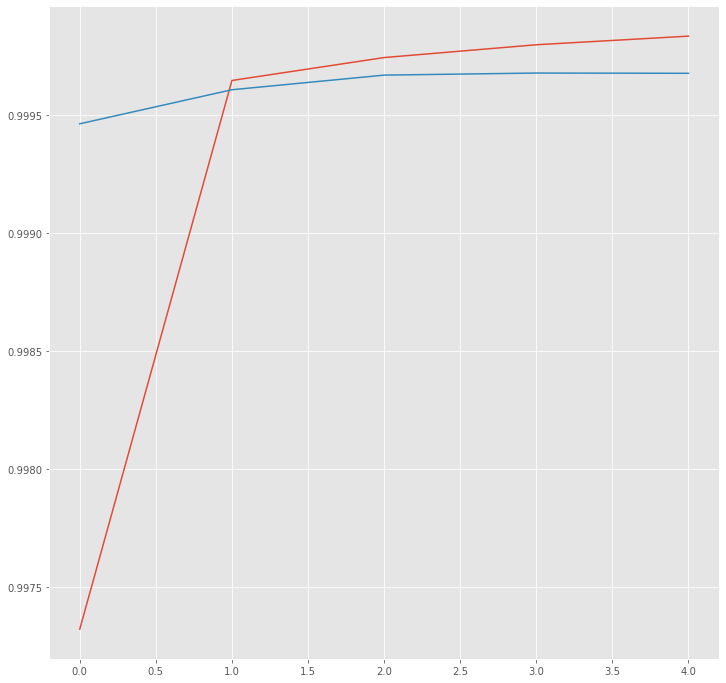

In [57]:
plt.figure(figsize=(12,12))
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.show()


In [58]:
print("Evaluate on test data")
results = model.evaluate(XTest, np.array(YTest), batch_size=32)
print(results)

Evaluate on test data
38098/38098 [==============================] - 19s 493us/step
[0.0009345644561410858, 0.9997632503509521, 0.997644305229187, 0.9972702860832214]


In [59]:
model.save('SaveModel\Model13991121Testsize4000Confidence95\Model\Model')

In [60]:
from sklearn.metrics import classification_report

y_pred = model.predict(XTest, batch_size=64, verbose=1)


38098/38098 [==============================] - 11s 285us/step


In [46]:
i = 1521
XTest[i]
np.array([XTest[i]])

array([[ 62679,  31691,  18773,  79695, 105627, 120668,  51927,  77319,
         24822,  45413, 140148, 140148, 140148, 140148, 140148, 140148,
        140148, 140148, 140148, 140148, 140148, 140148, 140148, 140148,
        140148, 140148, 140148, 140148, 140148, 140148, 140148, 140148,
        140148, 140148, 140148, 140148, 140148, 140148, 140148, 140148,
        140148, 140148, 140148, 140148, 140148, 140148, 140148, 140148,
        140148, 140148]])

In [ ]:
p = model.predict(np.array([XTest[i]]))
p = np.argmax(p, axis=-1)
print("{:15} ({:5}): {}".format("Word", "True", "Pred"))
for w, pred in zip(XTest[i], p[0]):
    print("{:15}: {}".format(wordsTest[w], tagsTest[pred]))